In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import ast

# step 0: load the data

In [4]:
df = pd.read_csv("track_features_lst1_1.csv")

In [19]:
df = df.dropna()

In [12]:
# make each row with str elements into dicts and assign them to the corresponding features
df2 = pd.DataFrame(columns=["danceability","energy","loudness","speechiness","acousticness", "instrumentalness","liveness","valence","tempo","id","duration_ms"])
for i in range(len(df)):
    try:
        df2.loc[i] = ast.literal_eval(df.loc[i][0])
    except:
        pass

In [21]:
X = pd.DataFrame(df2)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.792,0.6790,-5.516,0.0410,0.5170,0.000015,0.0962,0.2040,119.932,7DyDjhZMEIK5Ied4juTCyc,151320
1,0.662,0.7260,-6.786,0.0516,0.1320,0.000000,0.4550,0.4080,149.944,7jYwZOptDPesQgzj7vhsEF,148800
2,0.888,0.6070,-5.632,0.1650,0.1470,0.000000,0.1110,0.7280,103.136,11eYmv0tA3wEoyD1Sad2Nv,134888
3,0.613,0.9350,-2.653,0.0404,0.0255,0.000000,0.1840,0.8590,77.498,54eE5H6F1HhyM5L4fRLq8s,170371
4,0.707,0.6810,-4.325,0.0668,0.0632,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455
...,...,...,...,...,...,...,...,...,...,...,...
38434,0.263,0.2390,-35.116,0.0846,0.8510,0.973000,0.1120,0.4170,69.801,5kIF95v6YpJ9E0zw8RjFkD,172800
38435,0.141,0.3940,-33.184,0.1570,0.9430,0.504000,0.1120,0.0330,139.246,4QlqE1sO6rXsIR9AZOlawN,214000
38436,0.177,0.0856,-42.557,0.0711,0.8750,0.966000,0.1030,0.0768,89.477,1YQGoYjVe5MInsnmUnclFD,144149
38437,0.149,0.0695,-41.071,0.0582,0.7890,0.973000,0.1090,0.0594,138.516,0bohmotsrCFyZ4Wfouo7CV,223500


# step 1: clean the data

In [22]:
X.index=X["id"]

In [23]:
X = X.drop("id",axis=1)

In [24]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,38124.000000,38124.000000,38124.000000,38124.000000,38124.000000,38124.000000,38124.000000,38124.000000,38124.000000,3.812400e+04
mean,0.515163,0.415263,-15.577850,0.079343,0.525556,0.476559,0.163838,0.340662,112.280532,1.964441e+05
std,0.230633,0.320109,10.481053,0.083758,0.401482,0.429636,0.140753,0.262805,31.291786,7.019787e+04
min,0.000000,0.000020,-51.978000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+03
25%,0.341000,0.086700,-24.036000,0.038000,0.088600,0.000022,0.098300,0.112750,85.401750,1.518370e+05
50%,0.552000,0.413000,-11.879000,0.046900,0.566000,0.656000,0.111000,0.280000,112.206500,1.840000e+05
75%,0.701000,0.702000,-6.761750,0.075025,0.952000,0.905000,0.158000,0.533000,132.934250,2.252800e+05
max,0.982000,1.000000,1.260000,0.944000,0.996000,1.000000,0.990000,0.992000,219.849000,1.782178e+06


# step 2: scale the data

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns, index=X.index)
display(X.head())
print()
display(X_scaled_df.head())

# save scaler in pickle file
with open("Model/scaler_38k.pkl", "wb") as f:
    pickle.dump(scaler,f)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
7DyDjhZMEIK5Ied4juTCyc,0.792,0.679,-5.516,0.0410,0.5170,0.000015,0.0962,0.204,119.932,151320
7jYwZOptDPesQgzj7vhsEF,0.662,0.726,-6.786,0.0516,0.1320,0.000000,0.4550,0.408,149.944,148800
11eYmv0tA3wEoyD1Sad2Nv,0.888,0.607,-5.632,0.1650,0.1470,0.000000,0.1110,0.728,103.136,134888
54eE5H6F1HhyM5L4fRLq8s,0.613,0.935,-2.653,0.0404,0.0255,0.000000,0.1840,0.859,77.498,170371
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
7DyDjhZMEIK5Ied4juTCyc,1.200349,0.823908,0.960016,-0.457786,-0.021312,-1.109195,-0.480548,-0.520020,0.244523,-0.642822
7jYwZOptDPesQgzj7vhsEF,0.636676,0.970735,0.838844,-0.331229,-0.980272,-1.109230,2.068640,0.256230,1.203637,-0.678721
11eYmv0tA3wEoyD1Sad2Nv,1.616600,0.598982,0.948949,1.022695,-0.942910,-1.109230,-0.375398,1.473878,-0.292238,-0.876906
54eE5H6F1HhyM5L4fRLq8s,0.424215,1.623646,1.233180,-0.464949,-1.245542,-1.109230,0.143250,1.972353,-1.111569,-0.371428
0yLdNVWF3Srea0uzk55zFn,0.831794,0.830156,1.073651,-0.149750,-1.151639,-1.109218,-0.935253,1.161856,0.182749,0.057137


In [26]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04,3.812400e+04
mean,-1.402532e-15,-1.075603e-15,1.372263e-15,-4.381019e-17,1.802779e-15,-5.562401e-14,3.913985e-16,1.554266e-15,-1.251494e-15,-4.345490e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.233720e+00,-1.297210e+00,-3.472994e+00,-9.472996e-01,-1.309058e+00,-1.109230e+00,-1.164026e+00,-1.296271e+00,-3.588226e+00,-2.755734e+00
25%,-7.551627e-01,-1.026424e+00,-8.070049e-01,-4.936039e-01,-1.088373e+00,-1.109178e+00,-4.656283e-01,-8.672404e-01,-8.589837e-01,-6.354567e-01
50%,1.597220e-01,-7.069947e-03,3.529129e-01,-3.873436e-01,1.007371e-01,4.176629e-01,-3.753979e-01,-2.308290e-01,-2.365895e-03,-1.772744e-01
75%,8.057780e-01,8.957596e-01,8.411575e-01,-5.154908e-02,1.062187e+00,9.972304e-01,-4.147411e-02,7.318741e-01,6.600451e-01,4.107853e-01
max,2.024179e+00,1.826705e+00,1.606525e+00,1.032346e+01,1.171783e+00,1.218350e+00,5.869687e+00,2.478438e+00,3.437639e+00,2.258978e+01


# step 3: cluster the data

## assign k=8 as default

In [79]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [91]:
kmeans.labels_

array([15,  7,  9, ..., 11,  8,  8])

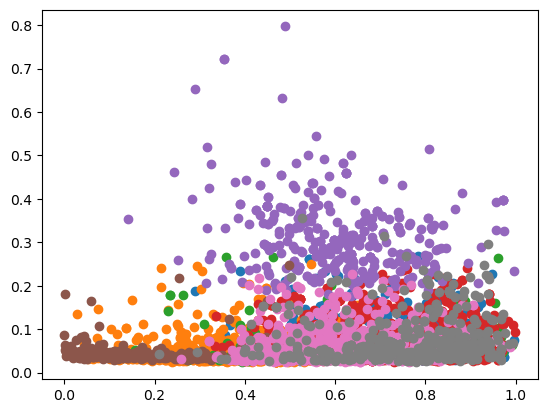

In [82]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [84]:
kmeans8 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans8.fit(X_scaled_df)
print(kmeans8.inertia_)

20874.207693646178


## now find the optimal k

## try elbow

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

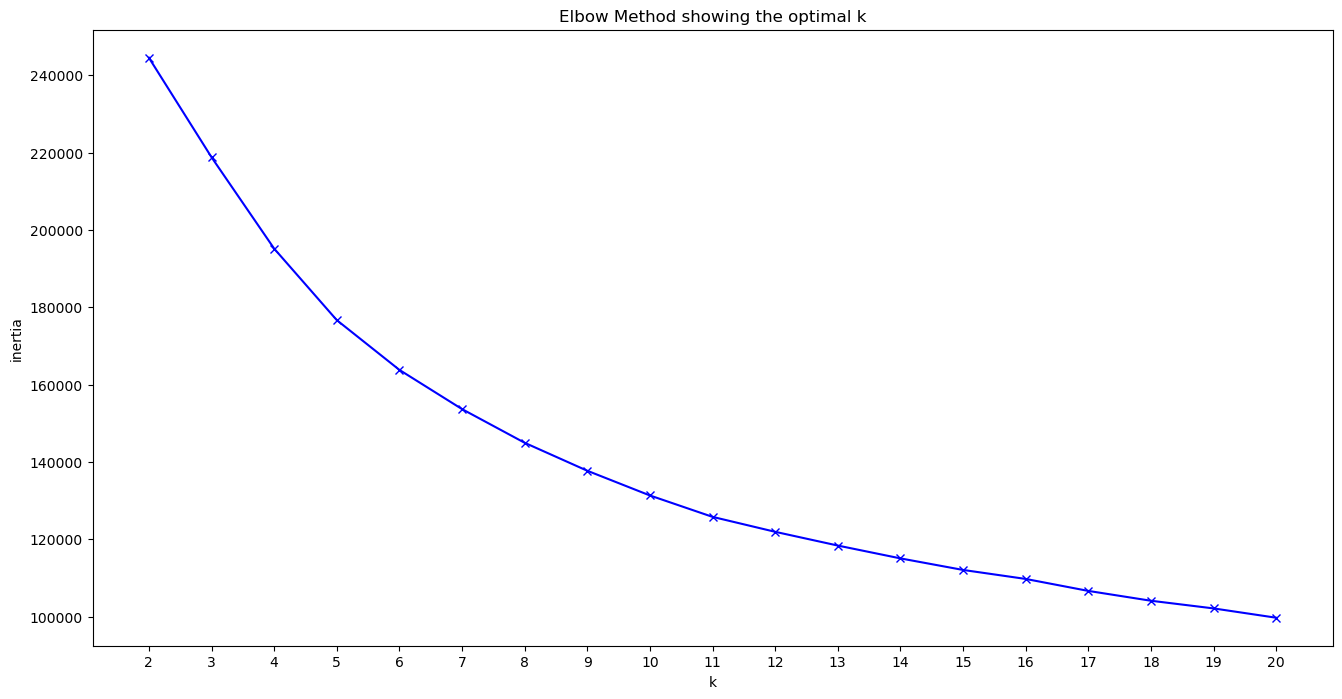

In [27]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## try silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

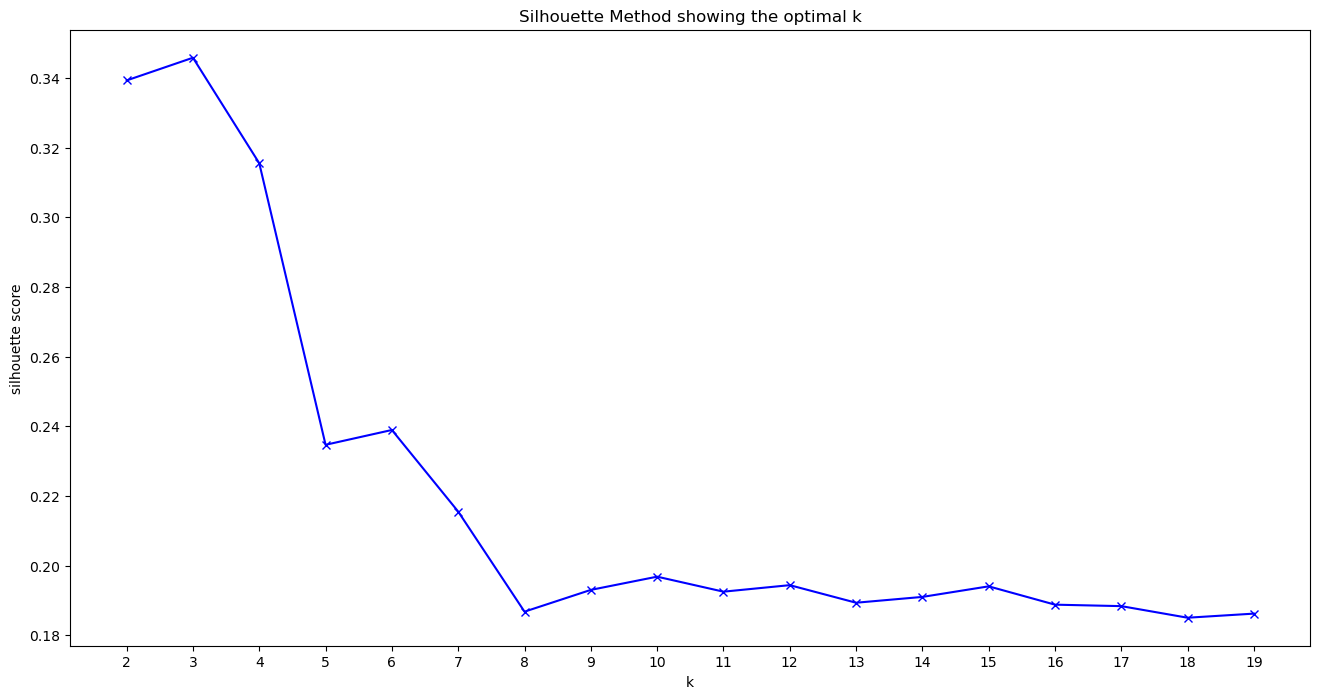

In [28]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)

    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)

    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [118]:
len(X_scaled_df.columns)

11

# step 4: apply optimal model

In [29]:
kmeans15 = KMeans(n_clusters=15,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans15.fit(X_scaled_df)
print(kmeans15.inertia_)

118111.77951875608


In [30]:
with open("Model/kmeans_4.pkl", "wb") as f:
    pickle.dump(kmeans15,f)

In [31]:
X_scaled_df["cluster"] = kmeans15.labels_

## assign labels

In [114]:
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,
7DyDjhZMEIK5Ied4juTCyc,0.980957,0.324332,0.539869,-0.536925,0.646928,-0.383184,-0.595183,-1.156541,-0.086422,-0.699273,2
7jYwZOptDPesQgzj7vhsEF,0.172983,0.534264,0.253696,-0.409647,-0.574832,-0.383244,2.256630,-0.306760,1.017557,-0.733891,1
11eYmv0tA3wEoyD1Sad2Nv,1.577615,0.002735,0.513731,0.951988,-0.527231,-0.383244,-0.477550,1.026230,-0.704256,-0.925001,0
54eE5H6F1HhyM5L4fRLq8s,-0.131561,1.467788,1.185000,-0.544129,-0.912800,-0.383244,0.102668,1.571923,-1.647339,-0.437568,1
0yLdNVWF3Srea0uzk55zFn,0.452667,0.333266,0.808242,-0.227135,-0.793163,-0.383224,-1.103868,0.684651,-0.157527,-0.024302,1
...,...,...,...,...,...,...,...,...,...,...,...
1MQHacUW73AKPG9nlf28oZ,-0.591484,-2.078711,-1.046480,3.209373,1.329210,2.443453,-0.223208,-0.502543,1.411704,-0.964674,0
43rQHWHRNUYvjp1kauDnjL,0.825577,-0.059797,-0.593109,0.555745,-0.495497,-0.221488,-0.517291,0.401391,-1.628616,-1.277453,0
1dGC8B4AVlFvTE7hW1ZNK3,0.471312,-0.618125,-0.109092,-0.550133,0.548552,2.111852,-0.318586,-0.590021,-1.739485,-0.841040,2


In [115]:
df_clustered = X_scaled_df["cluster"]

# step 5: save to .csv

In [116]:
df_clustered.to_csv("df_clustered.csv", index_label=False)